In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2 #libreria de opencv

import numpy as np #libreria para manejo de arrays

from matplotlib import pyplot as plt #libreria para visualizar graficos y otros

from google.colab.patches import cv2_imshow #modulo para visualizar imagenes en google colaboratory

Image Dimensiones :  (384, 400, 3)
Alto:  384 ,Ancho:  400 Número de canales: 3


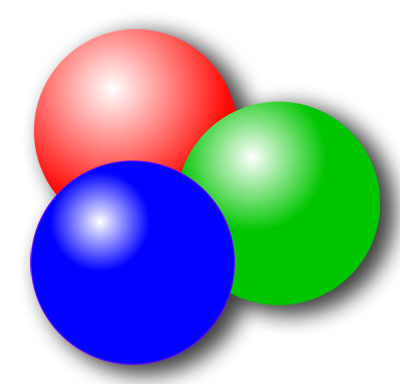

In [0]:
img = cv2.imread("/content/drive/My Drive/Computer_vision/Images/imagen1.jpg")
if img.size == 0:
    print("Error: la imagen no fue cargada con exito.")
else:
   print('Image Dimensiones : ',img.shape)
   print("Alto: ",str(img.shape[0]),",Ancho: ",img.shape[1],"Número de canales:",img.shape[2])
   cv2_imshow(img)

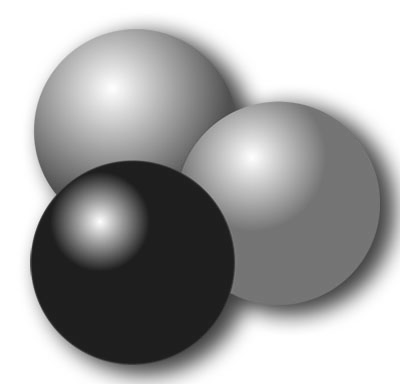

In [0]:
#convirtiendo la imagen a escala de grises

processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#guardando la imagen en drive

cv2.imwrite('/content/drive/My Drive/Computer_vision/Images/imagen1_processed_gray.png', processed_image)

cv2_imshow(processed_image)

In [0]:
#extrayendo el canal rojo (RED channel)

red_channel = img[:,:,2]

#extrayendo el canal verde (Green channel)

green_channel = img[:,:,1]

#extrayendo el canal azul (blue channel)

blue_channel = img[:,:,0]

cv2.imwrite('/content/drive/My Drive/Computer_vision/Images/imagen1_processed_red.png', red_channel)

cv2.imwrite('/content/drive/My Drive/Computer_vision/Images/imagen1_processed_green.png', green_channel)

cv2.imwrite('/content/drive/My Drive/Computer_vision/Images/imagen1_processed_blue.png', blue_channel)

True

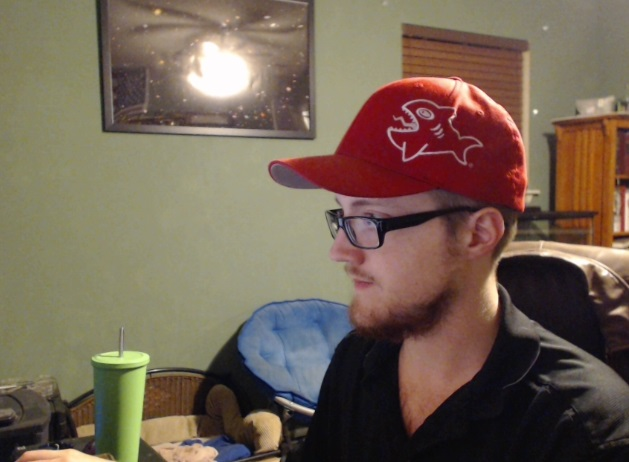

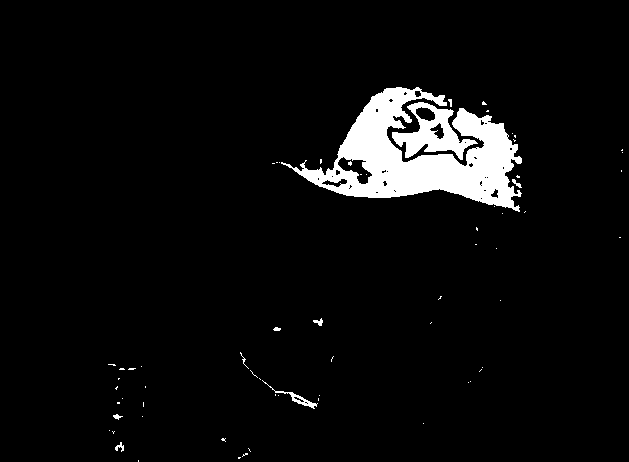

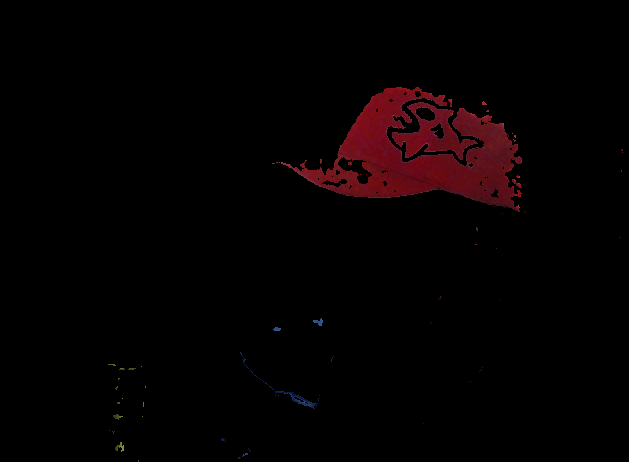

In [0]:
#Cargamos la imagen de la que queremos reslartar el rojo

img = cv2.imread("/content/drive/My Drive/Computer_vision/Images/imagen2.jpg")

#convertimos la imagen a RGB HSV

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([30,150,50]) # codigo minimo del rojo en del B,G,R

upper_red = np.array([255,255,180]) # codigo maximo del rojo en B,G,R

#Creamos una mascara de la imagen donde resaltaremos el color rojo

mask_red = cv2.inRange(hsv, lower_red, upper_red)

#aplicamos la mascara en la imagen

img_result = cv2.bitwise_and(img,img, mask = mask_red)

#visualizamos la imagen

cv2_imshow(img)

cv2_imshow(mask_red)

cv2_imshow(img_result)

# Gradiente de Imagenes


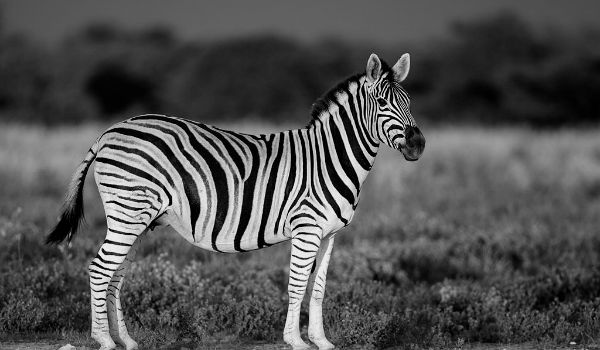

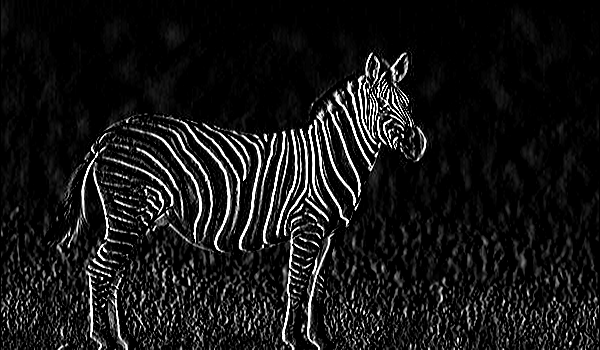

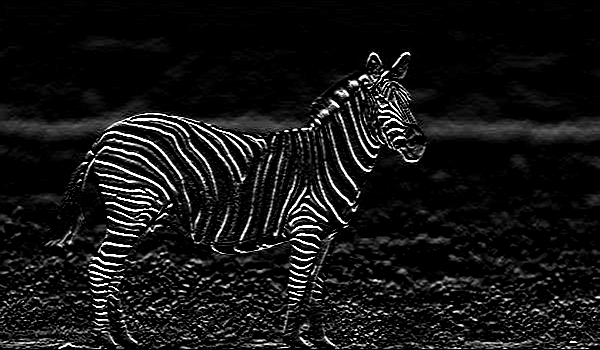

In [0]:
# cargamos la imagen y la pasamos de una a gris

img = cv2.imread("/content/drive/My Drive/Computer_vision/Images/cebra.jpg",0)

#cambiar CV_64F por CV_8U, si quiere verlo en negro/blanco

laplacian = cv2.Laplacian(img,cv2.CV_64F)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

cv2_imshow(img)

cv2_imshow(sobelx)

cv2_imshow(sobely)

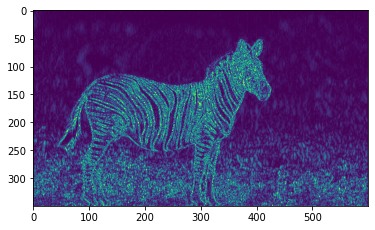

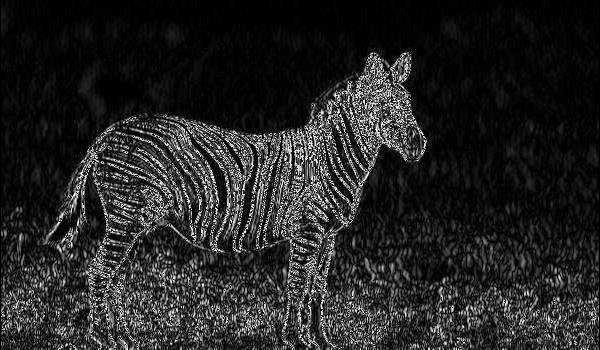

In [0]:
sobelx8u=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)

#Utilizando cv2.CV_64F. Luego toma el valor absoluto y hace la conversión a cv2.CV_8


sobelx64f=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

abs_sobel64f=np.absolute(sobelx64f)

sobel_8u=np.uint8(abs_sobel64f)

plt.imshow(sobel_8u)

plt.show()

cv2_imshow(sobel_8u)

#COINS

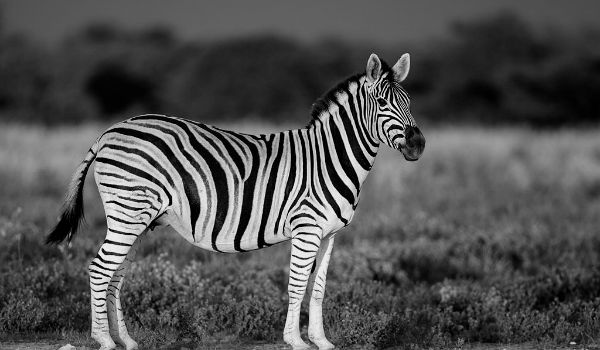

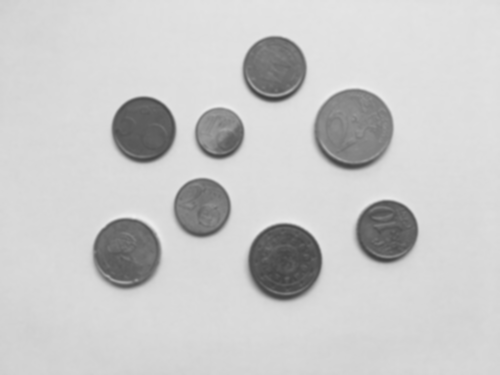

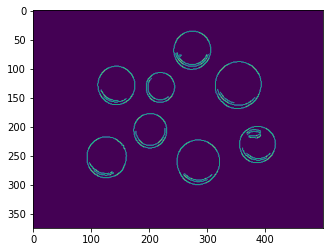

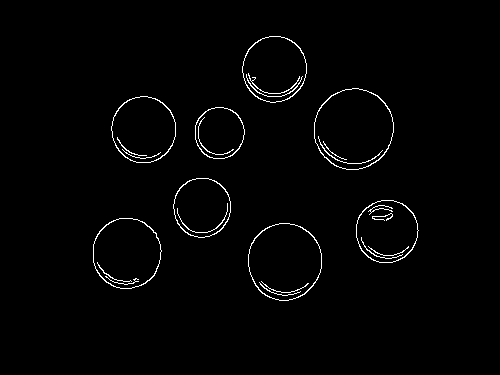

In [0]:
img_gris = cv2.imread("/content/drive/My Drive/Computer_vision/Images/coins.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 50, 150)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)


In [0]:
contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

print("He encontrado {} objetos".format(len(contornos)))

He encontrado 8 objetos


#COINS 2

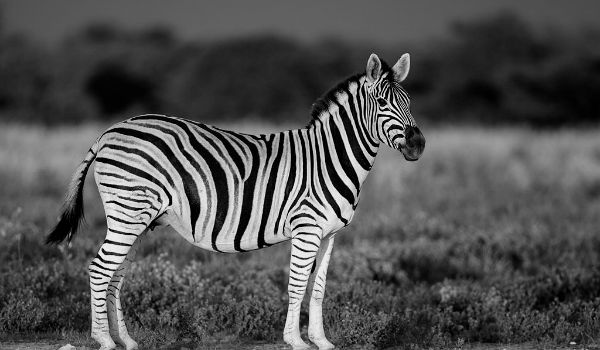

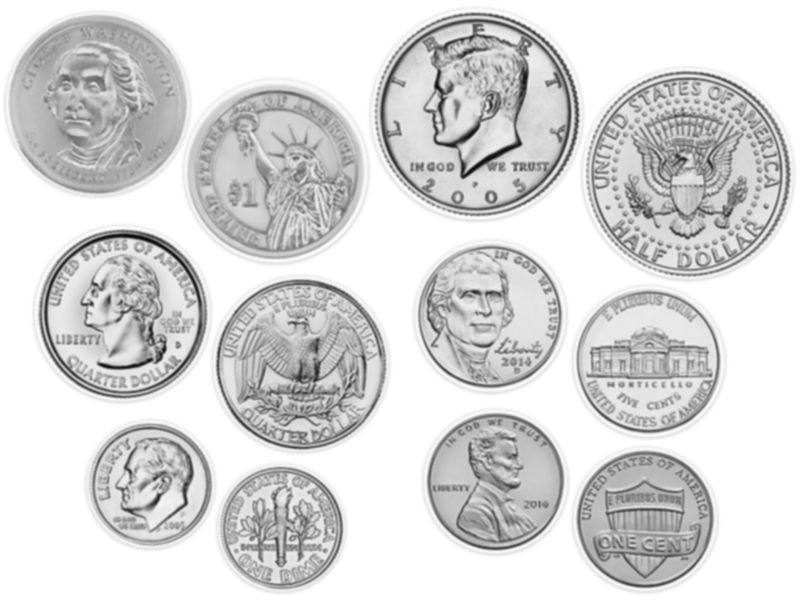

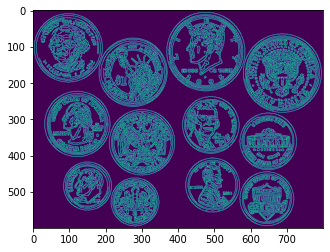

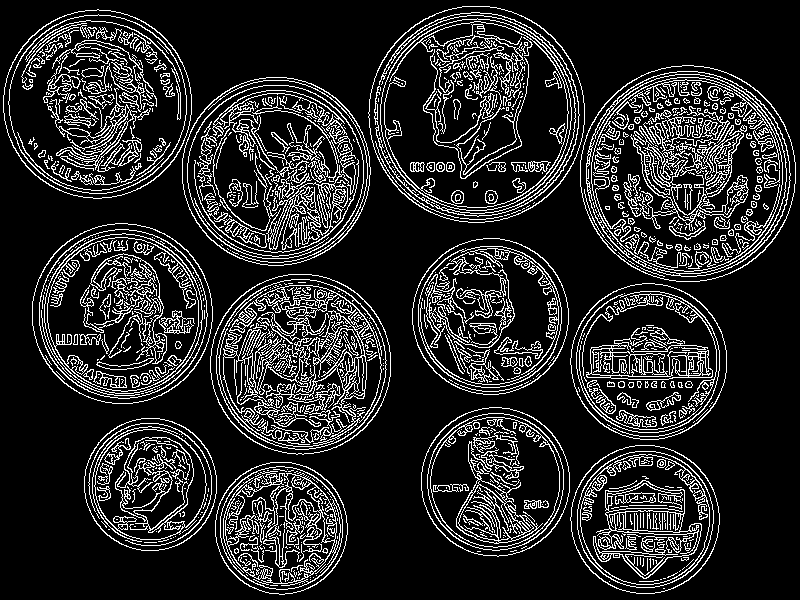

In [56]:
img_gris = cv2.imread("/content/drive/My Drive/Computer_vision/Images/coins2.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 30, 80)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)


In [57]:
contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

print("He encontrado {} objetos".format(len(contornos)))

He encontrado 12 objetos


#COINS 3


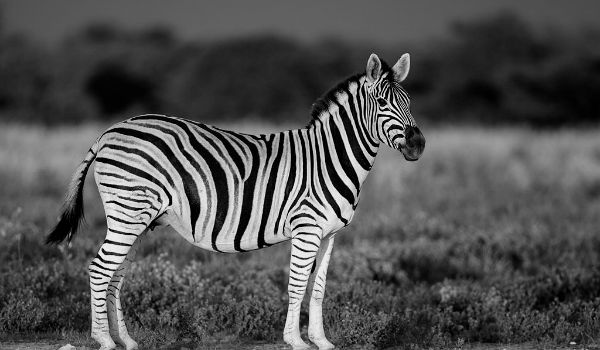

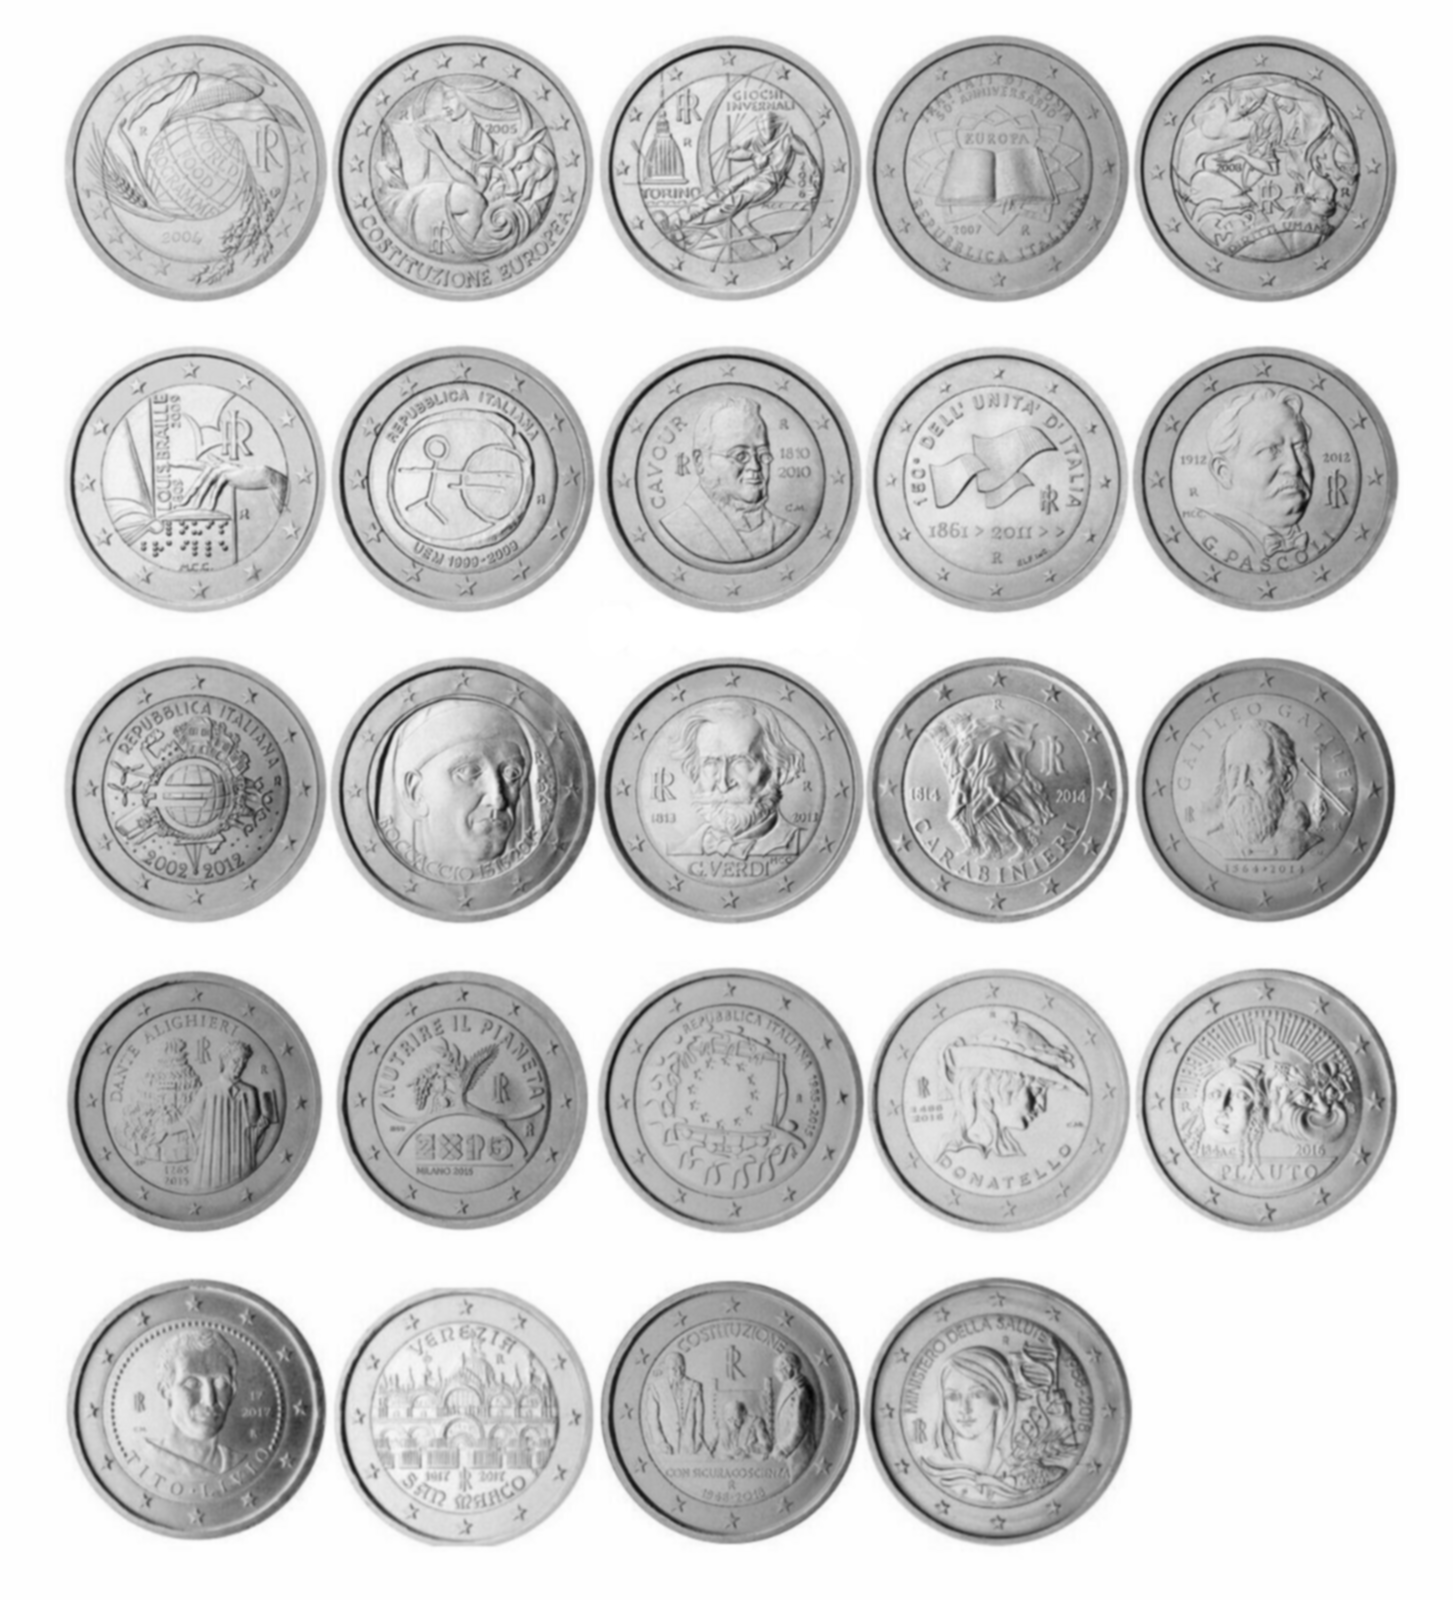

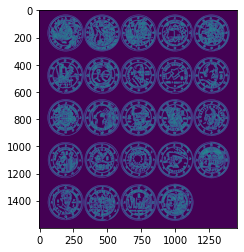

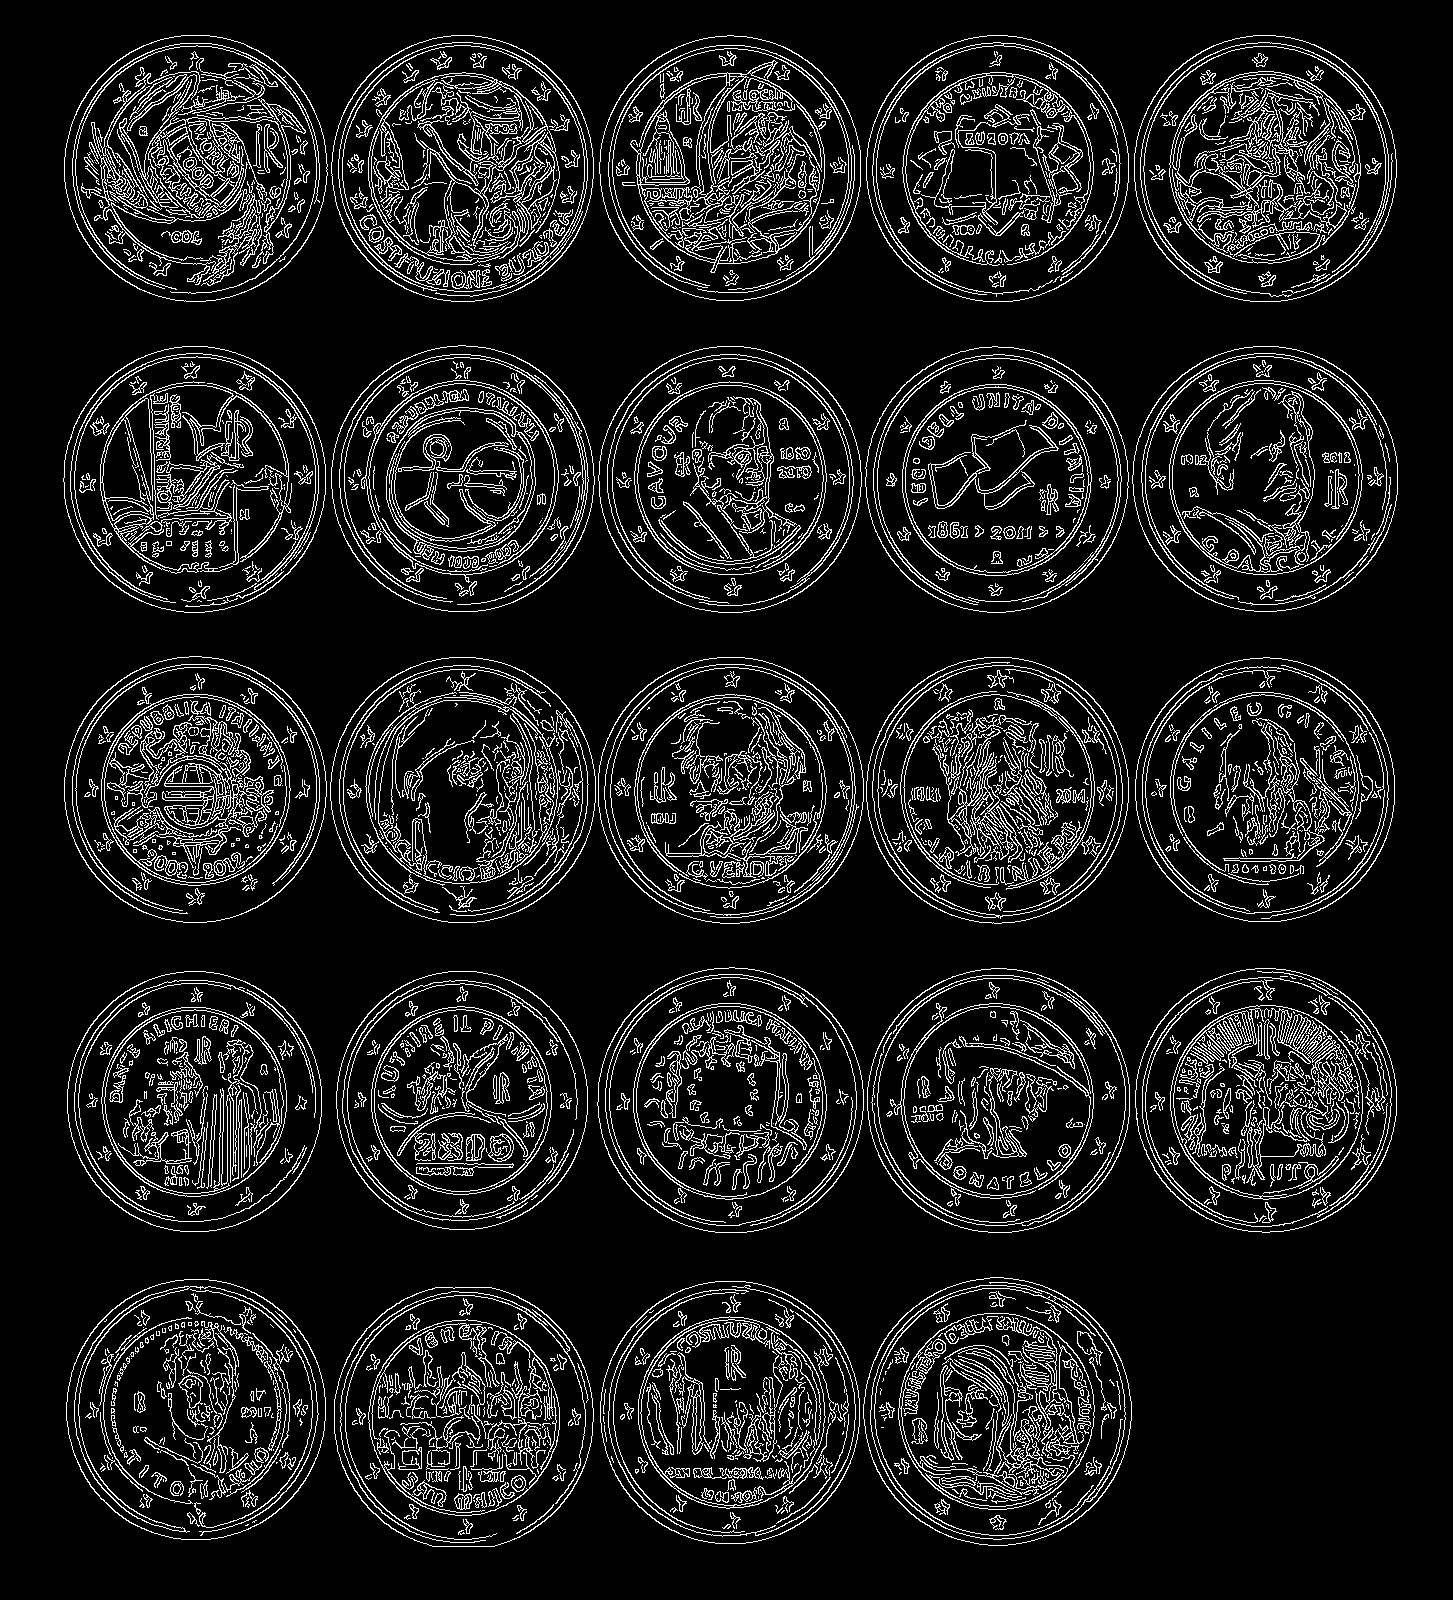

In [0]:
img_gris = cv2.imread("/content/drive/My Drive/Computer_vision/Images/coins3_Modificado.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 30, 80)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)

In [0]:
contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

print("He encontrado {} objetos".format(len(contornos)))

He encontrado 24 objetos
